## Employee Attrition Predictive Analysis


### Overview
In recent times, it has become extremely important for companies to retain their employees and keep them satisfied. In addition to acquiring talented people, it is essential to hold onto them in the long term. If you invest significant amount of time and money in an employee, and then he/she leaves the job, that would mean spending even more time and money to hire somebody else. Therefore, minimizing employee attrition is crucial for the success of any company.

The objective of this project is to predict employee attrition and to determine the causal factors behind it.

This project is divided into three phases:

1) Data Exploration

2) Data Preparation

3) Data Modeling



### Data Exploration

Let us explore the IBM Human Resources dataset which contains information of employees on several important job parameters.

We begin by importing useful libraries and packages for the analysis.

In [27]:
# import packages and libraries
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Then, we load the dataset (.csv format) into a pandas dataframe.

In [7]:
# load the dataset into pandas dataframe
df = pd.read_csv('/Users/labdhighelani/Downloads/HR_dataset1.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Next, we print details about the dataset and variables. We see that the dataset consists of records of 1470 employees, and each record has 35 variables associated with it. The variables consist of mixed data types. We would have to convert the categorical variables into binary numerical variables by using dummy variables. We perform this conversion later in this analysis.

In [9]:
# print dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Next, we check the dataset for missing values or null values.

In [11]:
# find missing values in each variable
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We see that 5 variables have missing values associated with them. We impute these values with the mean of the respective variables. We again check for missing values and see that all the missing values have been imputed.

In [12]:
# impute the null values with mean of respective variables
df = df.fillna(value=df.mean())
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Next, we create histograms and kde plots of the variables to understand how the data is distributed.

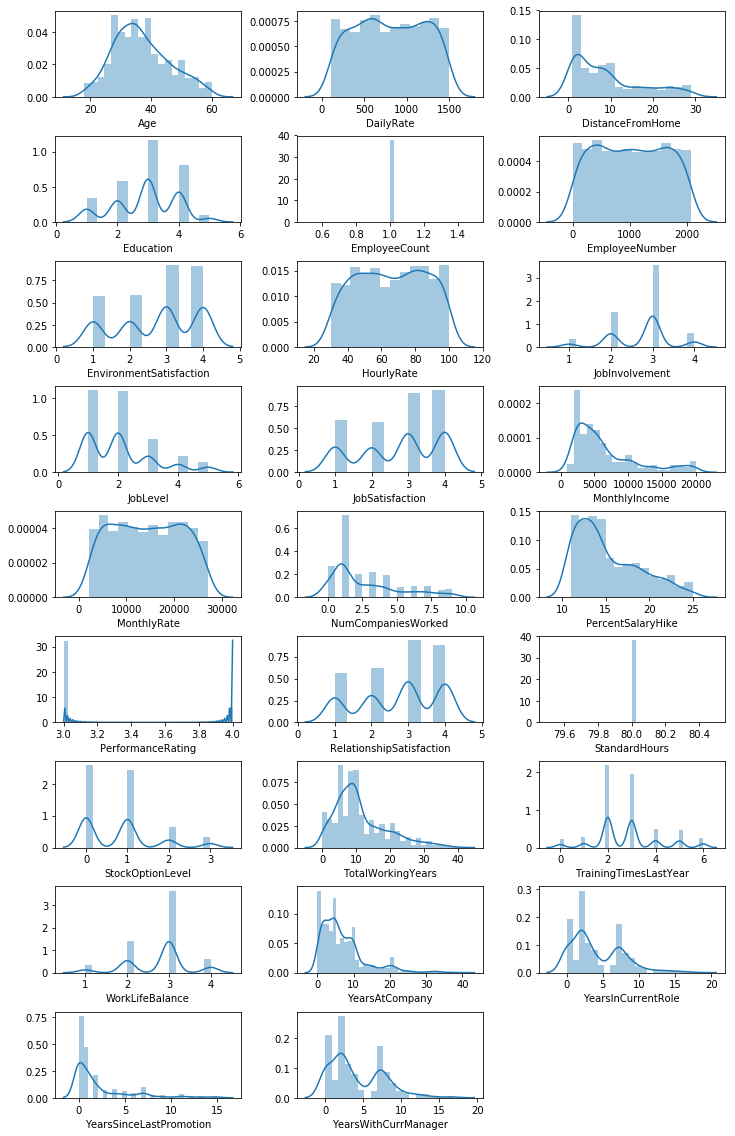

In [13]:
# create distribution plots of variables
plt.figure(figsize=(12,20))
count = 0
for col,i in df.iteritems():
    if i.dtype != 'object':
        count += 1
        plt.subplot(9,3,count)
        plt.subplots_adjust(wspace=0.3, hspace=0.45)
        sns.distplot(df[col])

We see that the variables 'StandardHours' and 'EmployeeCount' have the same value for all the records. Also, we see that the variable 'EmployeeNumber' is employee ID and therefore, it is not useful for our analysis. So, we remove these redundant variables. Moreover, we see that variables 'HourlyRate', 'MonthlyRate', Monthly Income', DailyRate' are interrelated. So, we keep 'MonthlyIncome' and remove the rest.

In [14]:
# remove redundant variables
df = df.drop(['EmployeeNumber','StandardHours', 'EmployeeCount', 'DailyRate','HourlyRate', 'MonthlyRate'], axis=1)

### Data Preparation

We need to modify our dataset before we fit a model to it. This is done to ensure that the model gives accurate results.

First, we check if any of the variables have strong correlation with each other or with the target variable. It is important to remove such variables as they can give inaccurate results. To achieve this, we create a correlation matrix and a correlation plot of the variables.

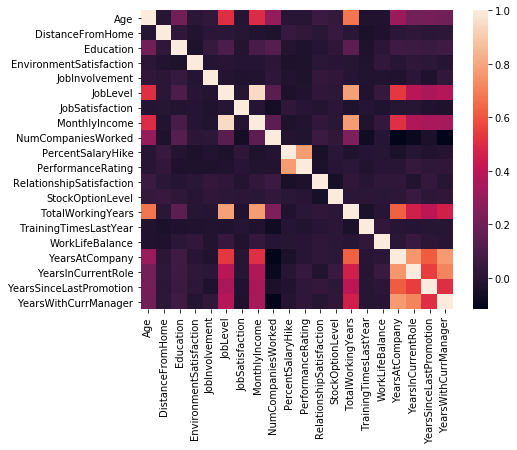

In [15]:
correlation = df.corr()
plt.figure(figsize=(7,5.5))
sns.heatmap(correlation)

We see that some of the variables have high correlation with each other. Therefore, we just keep one out of such variables and remove the others - TotalWorkingYears, PercentSalaryHike, JobLevel, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion.

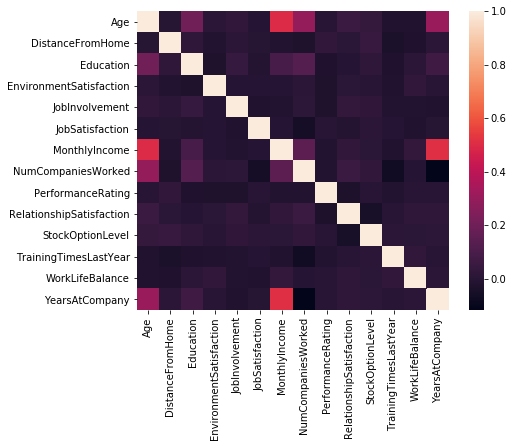

In [16]:
# remove variables with high correlation
df=df.drop(['TotalWorkingYears','PercentSalaryHike','JobLevel','YearsInCurrentRole',
            'YearsWithCurrManager','YearsSinceLastPromotion'], axis=1)
correlation1 = df.corr()
plt.figure(figsize=(7,5.5))
sns.heatmap(correlation1)

Next, we convert the target variable 'Attrition' into binary numerical variable by creating a dictionary with the mapping given as 1 : Yes and 0 : No. We save it into a new dataframe. Then, we remove the original variable from the first dataframe.

In [18]:
# convert target variable into binary numerical variable and save into new dataframe
target_map = {'Yes':1, 'No':0}
target = df['Attrition'].apply(lambda x: target_map[x])
df_target = pd.DataFrame(target)
df = df.drop(['Attrition'], axis=1)
df_target.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


For the analysis, we need to convert the categorical variables into binary numerical variables. We do this by using dummy variables. 

In [19]:
# create dummy variables for categorical variables
df = pd.get_dummies(df)
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,2,2,3,4,5993,8,3,1,...,0,0,1,0,0,0,1,1,0,1
1,49,8,1,3,2,2,5130,1,4,4,...,0,1,0,0,0,1,0,1,1,0
2,37,2,2,4,2,3,2090,6,3,2,...,0,0,0,0,0,0,1,1,0,1
3,33,3,4,4,3,3,2909,1,3,3,...,0,1,0,0,0,1,0,1,0,1
4,27,2,1,1,3,2,3468,9,3,4,...,0,0,0,0,0,1,0,1,1,0


### Data Modelling:

We use predictive modeling to determine employee attrition and to find its causal factors. For this, we use two different machine learning algorithms from the Scikit-Learn Library. The two models that we fit to our dataset are - 

1)	Logistic Regression Model

2)	Random Forest Model

<br>

First, we split the dataset into Training set and Testing set. We use a partition size of 70:30. This is done so that we can evaluate the accuracy of our model.

In [21]:
# split data into training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, df_target, test_size=0.3)
print('Train-Test Split completed')

Train-Test Split completed


### 1) Logistic Regression Model

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a binary variable (in which there are only two possible outcomes). The goal of logistic regression is to find the best fitting model to describe the relationship between the binary characteristic of the dependent variable and a set of independent variables.

We begin by fitting this model to our training sets.

In [22]:
# fit logistic regression model to data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
print('Logistic Regression Model trained')

Logistic Regression Model trained


Then, we use this model to predict the values of the target variable 'Attrition'.

In [23]:
# predict target values using the model
predictions = lr.predict(X_test)
print('Predictions completed')

Predictions completed


Next, we evaluate our model by comparing the predicted values to the actual values (testing set). For this we use metrics such as Accuracy Score and Classification Report.

In [24]:
# evaluate the model
from sklearn import metrics
print('\nAccuracy of Logistic Regression Model =', metrics.accuracy_score(Y_test, predictions))
print('\nClassification Report =\n\n', metrics.classification_report(Y_test, predictions))


Accuracy of Logistic Regression Model = 0.8707482993197279

Classification Report =

              precision    recall  f1-score   support

          0       0.90      0.95      0.93       376
          1       0.60      0.38      0.47        65

avg / total       0.85      0.87      0.86       441



##### We see that our model has high accuracy of 87%. This means that our model is good for predicting employee attrition. 

From the classification report, we see that the precision score is high for both 0 and 1. But, we see that the recall and f1 score for 1 is low. This means that the model is less accurate while predicting 1 as compared to predicting 0. This happens because our training set has significantly less amount of 1s as compared to 0s.

Next, we use this model to determine the variables which affect the target variables the most. For this, we use the variable coefficients of the regression model.

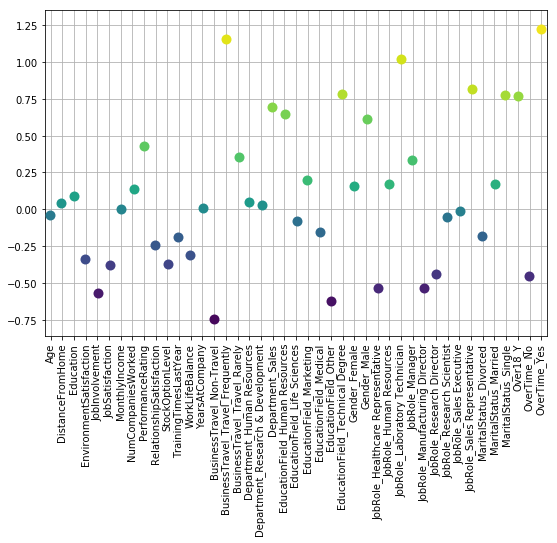

In [25]:
# determine causal factors
y = lr.coef_[0]
x = df.columns.values
plt.figure(figsize=(9,6))
sns.stripplot(x,y,size=10,hue=y,palette='viridis').legend_.remove()
plt.xticks(rotation='vertical')
plt.grid()

We see that the variables 'OverTime_Yes', 'BusinessTravel_Frequently', and 'PerformanceRating' have the highest coefficients. 

##### Therefore, this model shows that Overtime Work, Frequent Business Travel, and Low Performance Rating are the major causal factors behind employee attrition. 

If employees have to work overtime repeatedly, then they get frustated and tend to leave the job. If the job involves a lot of travel, then the employees tend to look for jobs with less travel. Also, if the employees are not able to perform well at the job, they are not satisfied and tend to leave the job. To minimize employee attrition, companies must keep these factors in mind.

### 2) Random Forest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

We begin by fitting this model to our training sets.

In [28]:
# fit random forest model to data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)
print('Random Forest Model trained')

Random Forest Model trained


Then, we use this model to predict the values of the target variable 'Attrition'.

In [29]:
# predict target values using the model
predictions1 = rf.predict(X_test)
print("Predictions completed")

Predictions completed


Next, we evaluate our model by comparing the predicted values to the actual values (testing set). For this we use metrics such as Accuracy Score and Classification Report.

In [32]:
# evaluate the model
print('\nAccuracy of Random Forest Model =', metrics.accuracy_score(Y_test, predictions1))
print('\nClassification Report =\n\n', metrics.classification_report(Y_test, predictions1))


Accuracy of Random Forest Model = 0.8458049886621315

Classification Report =

              precision    recall  f1-score   support

          0       0.86      0.98      0.92       376
          1       0.40      0.09      0.15        65

avg / total       0.79      0.85      0.80       441



##### We see that our model has high accuracy of 84%. This means that our model is good for predicting employee attrition. 

From the classification report, we see that the precision score is high for both 0 and 1. But, we see that the recall and f1 score for 1 is low. This means that the model is less accurate while predicting 1 as compared to predicting 0. This happens because our training set has significantly less amount of 1s as compared to 0s.

Next, we use this model to determine the variables which affect the target variables the most. For this, we use the feature importances from the model.

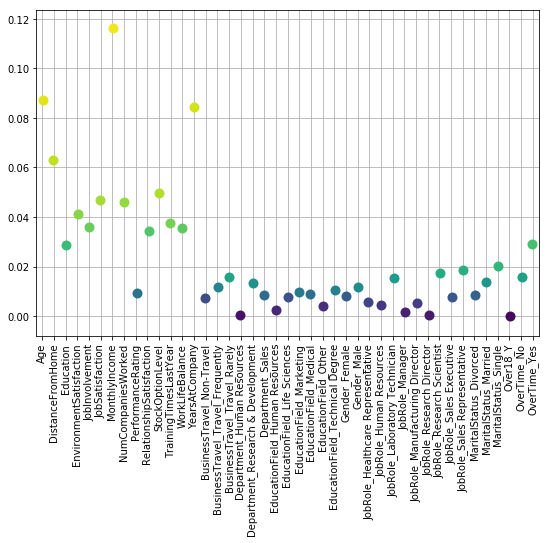

In [31]:
# determine causal factors
y1 = rf.feature_importances_
x1 = df.columns.values
plt.figure(figsize=(9,6))
sns.stripplot(x1,y1,size=10,hue=y1,palette='viridis').legend_.remove()
plt.xticks(rotation='vertical')
plt.grid()

We see that the variables 'MonthlyIncome', 'Age', and 'DistanceFromHome' have the highest feature importances. 

##### Therefore, this model shows that Low Income, Old Age, and Long Commute to Work are the major causal factors behind employee attrition.

If the income is low, then the employees are not satisfied and tend to look for better paying jobs. As the employees get old, their working ability gets affected, so they tend to leave the job. Also, if the work site is too far away from home, then the employees tend to look for jobs which are located nearby. To minimize employee attrition, companies must keep these factors in mind.

### Conclusion

We have created two predictive models for determing employee attrition and to find the causal factors behind it. Logistic Regression Model has an accuracy of 87% while predicting employee attrition and shows that overtime work, frequent business travel, and low performance are the major contributing factors. Random Forest Model has an accuracy of 84% while predicting employee attrition and shows that low income, old age, and long commute distance to work are the major contributing factors. Therefore, the companies should keep check on these factors to minimize employee attrition.